# Question 1 : Classification using Naive Bayes

Can glucose and blood pressure data classify whether a patient has diabetes or not ? If yes, which classification algorithm should you use ?

The dataset **diabetes_classification.csv** has 3 columns and 995 entries with the above data.


1. Load the dataset.

In [51]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
data=pd.read_csv("diabetes.csv")
data.head()

,glucose,bloodpressure,diabetes
0,40,85,0
1,40,92,0
2,45,63,1
3,45,80,0
4,40,73,1


2. The dataset has two feature columns and one target column. Plot a bar graph or histogram showing the distribution of values in the feature columns (count of each value).

<Axes: >

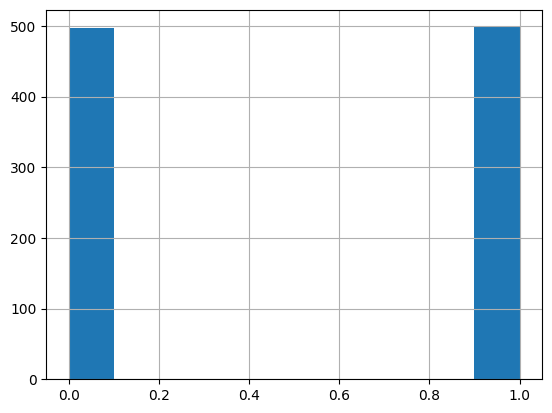

In [52]:
data["diabetes"].hist()

 The feature column **glucose** has a somewhat Gaussian distribution of data. So we will try out Gaussian Naive Bayes classification for the data using Scikit-Learn.

3. Split the dataset.
4. Fit a Gaussian NB model on the data. Make predictions and find the accuracy score.

Optional :
5. Compare the model with other classification algorithms like Logistic Regression, KNN, decision tree etc.

In [53]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

train,test=train_test_split(data,test_size=0.25)
X_test = test.iloc[:,:-1].values
Y_test = test.iloc[:,-1].values

def calculate_prior(data, Y):
    classes = sorted(list(data[Y].unique()))
    prior = []
    for i in classes:
        prior.append(len(data[data[Y]==i])/len(data))
    return prior

def calculate_likelihood_categorical(data, feat_name, feat_val, Y, label):
    feat = list(data.columns)
    data = data[data[Y]==label]
    p_x_given_y = len(data[data[feat_name]==feat_val]) / len(data)
    return p_x_given_y

def naive_bayes_categorical(data, X, Y):
    features = list(data.columns)[:-1]

    prior = calculate_prior(data, Y)

    Y_pred = []

    for x in X:

        labels = sorted(list(data[Y].unique()))
        likelihood = [1]*len(labels)
        for j in range(len(labels)):
            for i in range(len(features)):
                likelihood[j] *= calculate_likelihood_categorical(data, features[i], x[i], Y, labels[j])

        post_prob = [1]*len(labels)
        for j in range(len(labels)):
            post_prob[j] = likelihood[j] * prior[j]

        Y_pred.append(np.argmax(post_prob))

    return np.array(Y_pred) 

Y_pred = naive_bayes_categorical(train, X=X_test, Y="diabetes")

from sklearn.metrics import accuracy_score   
score = accuracy_score(Y_test, Y_pred)  
print(score)



0.9116465863453815


# Question 2 : Regression using SVM and Tree Algorithms

In this question, we will be using the **insurance.csv** file which contain information on insurance charges based on the following informations: age,sex,bmi,region,number of children and whether the person is a smoker or not. You need to predict the charges based on the information given.

### 1. Load the data.

In [54]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
data=pd.read_csv("insurance.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### 2. Separate the numerical and categorical columns.
### 3. Label Encode the categorical columns.
### 4. Scale the numerical columns. (Scale the charges separately so that you can calculate errors afterwards.)

In [55]:
numeric_data = data.select_dtypes(include=[np.number])
categorical_data = data.select_dtypes(exclude=[np.number])
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
categorical_data['sex']= le.fit_transform(categorical_data['sex'])
categorical_data['smoker']= le.fit_transform(categorical_data['smoker'])
categorical_data['region']= le.fit_transform(categorical_data['region'])
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numeric_data[["age","bmi","children"]]=scaler.fit_transform(numeric_data[["age","bmi","children"]])
numeric_data[["charges"]]=scaler.fit_transform(numeric_data[["charges"]])
data=pd.concat([numeric_data,categorical_data],axis=1)
data

,age,bmi,children,charges,sex,smoker,region
0,0.021739,0.321227,0.0,0.251611,0,1,3
1,0.000000,0.479150,0.2,0.009636,1,0,2
2,0.217391,0.458434,0.6,0.053115,1,0,2
3,0.326087,0.181464,0.0,0.333010,1,0,1
4,0.304348,0.347592,0.0,0.043816,1,0,1
...,...,...,...,...,...,...,...
1333,0.695652,0.403820,0.6,0.151299,1,0,1
1334,0.000000,0.429379,0.0,0.017305,0,0,0
1335,0.000000,0.562012,0.0,0.008108,0,0,2
1336,0.065217,0.264730,0.0,0.014144,0,0,3


### 5. Split the data.

In [56]:
from sklearn.model_selection import train_test_split
x=data.iloc[:,:-1].values
y=data.iloc[:,-1].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)
x_train

array([[0.02173913, 0.37826204, 0.        , 0.51374972, 0.        ,
        1.        ],
       [0.5       , 0.15657789, 0.2       , 0.08221424, 1.        ,
        0.        ],
       [0.17391304, 0.36373419, 0.2       , 0.03624172, 0.        ,
        0.        ],
       ...,
       [0.04347826, 0.22760291, 0.        , 0.39911218, 0.        ,
        1.        ],
       [0.        , 0.48210923, 0.        , 0.16537909, 0.        ,
        0.        ],
       [0.97826087, 0.56201238, 0.        , 0.20377317, 0.        ,
        0.        ]])

### 6. Support Vector Regressor

Here , you will use the SVR model from sklearn.svm and fit it on the training data. Then predict on the test data and calaculate MAE, MSE. But...

The SVR class contains many hyperparameters, example : kernel can have the following values : linear, rbf, poly, sigmoid.

Use **RandomizedSearchCV** from sklearn.model_selection , create a dictionary with keys 'kernel' and 'gamma' . As values of the keys, create a list of some possible values. Run a 3-fold cross validation test (cv=3) and find the best parameters. Then initiate the SVR model with those parameters.

In [57]:
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
svr=SVR()
hyperparam={'kernel':['linear','rbf','poly','sigmoid'],'gamma':['scale','auto']}
rnd_search = RandomizedSearchCV(svr, hyperparam, n_iter =4, cv=3)
rnd_search.fit(x_train,y_train)
param=rnd_search.best_params_
svr=SVR(kernel=param['kernel'],gamma=param['gamma'])
svr.fit(x_train,y_train)
y_pred = svr.predict(x_test)
mae_svr = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("best parameters:", param)
print("MAE:", mae_svr)
print("MSE:", mse)

best parameters: {'kernel': 'linear', 'gamma': 'scale'}
MAE: 0.9694826552324816
MSE: 1.2970145696720816


### 7. AdaBoost Regressor

We would do similar for AdaBoostRegressor from sklearn.ensemble . Here, the hyperparameters are n_estimators and loss.

Instead of RandomizedSearchCV, let's try GridSearchCV . Find the best parameters and then find errors on test data using the model with best parameters.

In [58]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV

abr=AdaBoostRegressor()
hyperparam={'n_estimators':list(range(50,200)),'loss':['linear', 'square', 'exponential']}
grid_search = GridSearchCV(abr, hyperparam, cv=3)
grid_search.fit(x_train,y_train)
param=grid_search.best_params_
abr=AdaBoostRegressor(n_estimators=param['n_estimators'],loss=param['loss'])
abr.fit(x_train,y_train)
y_pred = abr.predict(x_test)
mae_abr = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("best parameters:", param)
print("MAE:", mae_abr)
print("MSE:", mse)

best parameters: {'loss': 'linear', 'n_estimators': 139}
MAE: 0.9765669490166234
MSE: 1.2297287517418352


8. Now carry the same procedure for Random Forest Regressor and for Gradient Boosting Regression.
9. Finally, use <a href="https://xgboost.readthedocs.io/en/stable/get_started.html"> XGBoost Regressor </a> and compare all the models. Comment which model had the least error (MAE and MSE).
You will be required to run  <code> !pip install xgboost </code> to import xgboost models.

In [59]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost

rfr = RandomForestRegressor()
hyperparam={'n_estimators':list(range(50,200))}
grid_search = GridSearchCV(rfr, hyperparam, cv = 3)
grid_search.fit(x_train, y_train)
param=grid_search.best_params_
rfr= RandomForestRegressor(n_estimators=param['n_estimators'])
rfr.fit(x_train,y_train)
y_pred = rfr.predict(x_test)
mae_rfr = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("RandomForestRegressor :")
print("best parameters:", param)
print("MAE:", mae_rfr)
print("MSE:", mse)

gbr = GradientBoostingRegressor()
hyperparam={'n_estimators':list(range(50,200))}
grid_search = GridSearchCV(gbr, hyperparam, cv = 3)
grid_search.fit(x_train, y_train)
param=grid_search.best_params_
gbr= GradientBoostingRegressor(n_estimators=param['n_estimators'])
gbr.fit(x_train,y_train)
y_pred = gbr.predict(x_test)
mae_gbr = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("GradientBoostingRegressor :")
print("best parameters:", param)
print("MAE:", mae_gbr)
print("MSE:", mse)

xgb=xgboost.XGBRegressor()
hyperparam={'gamma':list(range(0,10)),'max_depth':list(range(1,10))}
grid_search = GridSearchCV(xgb, hyperparam, cv = 10)
grid_search.fit(x_train, y_train)
param=grid_search.best_params_
xgb= xgboost.XGBRegressor(gamma=param['gamma'],max_depth=param['max_depth'])
xgb.fit(x_train,y_train)
y_pred = xgb.predict(x_test)
mae_xgb = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("xgboost :")
print("best parameters:", param)
print("MAE:", mae_xgb)
print("MSE:", mse)

print("minimum MAE = ",min(mae_abr,mae_gbr,mae_rfr,mae_svr,mae_xgb))

RandomForestRegressor :
best parameters: {'n_estimators': 190}
MAE: 0.9340141398271797
MSE: 1.2489297556538637
GradientBoostingRegressor :
best parameters: {'n_estimators': 57}
MAE: 0.9368279075272302
MSE: 1.1955377820991888
xgboost :
best parameters: {'gamma': 2, 'max_depth': 4}
MAE: 0.9264377008623151
MSE: 1.1974514361360167
minimum MAE =  0.9264377008623151


# Question 3 : Classification using SVM and Tree Algorithms

In this question, we will be using the **bookmyshow_ads.csv** file which contain information on whether an url is spam or not based on 32 features. You need to classify the url as spam or not spam based on the information given.

### 1. Load the data.

In [60]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
data=pd.read_csv("bookmyshow_ads.csv")
data.head()

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,0,1,1,1,0,0,0,0,0,...,1,1,0,0,0,0,1,1,0,0
1,2,1,1,1,1,1,0,-1,1,0,...,1,1,0,0,-1,0,1,1,1,0
2,3,1,-1,1,1,1,0,0,0,0,...,1,1,1,0,1,0,1,-1,0,0
3,4,1,-1,1,1,1,0,0,0,1,...,1,1,0,0,1,0,1,0,1,0
4,5,1,-1,0,1,1,0,1,1,0,...,0,1,0,0,-1,0,1,1,1,1


### 2. Split the data.

In [61]:
from sklearn.model_selection import train_test_split
from sklearn import metrics  
from sklearn.metrics import accuracy_score  
x=data.iloc[:,1:-1].values
y=data.iloc[:,-1].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

x_train

array([[ 0,  0,  1, ...,  1,  1,  1],
       [ 1,  0,  0, ...,  1, -1,  1],
       [ 1,  0,  1, ...,  1, -1,  0],
       ...,
       [ 1,  0,  1, ...,  1, -1,  1],
       [ 0,  0,  0, ...,  1,  0,  0],
       [ 1,  0,  1, ...,  1, -1,  1]])

### 3. Model Comparison

Similar to the previous question, use the following classifier models from sklearn and compare them:
1. Decision Tree
2. Random Forest
3. Adaboost
4. Gradient Boost
5. XGBoost

For each model, you may also try to find the best hyperparameters using GridSearch Cross Validation or RandomizedSearch Cross Validation.

In [62]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier(criterion='entropy',max_depth=5)
clf1.fit(x_train,y_train)
y_pred1= clf1.predict(x_test)
print("Desicion tree accuracy = ",accuracy_score(y_test, y_pred1))

#Random Forest
from sklearn.ensemble import RandomForestClassifier
clf2 = RandomForestClassifier(n_estimators = 100)  
clf2.fit(x_train, y_train)
y_pred2 = clf2.predict(x_test)
print("Random Forest accuracy = ",accuracy_score(y_test, y_pred2))

#Adaboost
from sklearn.ensemble import AdaBoostClassifier
clf3 = AdaBoostClassifier()
clf3.fit(x_train,y_train)
y_pred3 = clf3.predict(x_test)
print("Adaboost accuracy = ",accuracy_score(y_test, y_pred3))

#Gradient Boost
from sklearn.ensemble import GradientBoostingClassifier
clf4 = GradientBoostingClassifier(n_estimators=300,learning_rate=0.05,max_features=10)
clf4.fit(x_train,y_train)
y_pred4 = clf4.predict(x_test)
print("Gradient boost accuracy = ",accuracy_score(y_test, y_pred4))

#XGBoost
import xgboost as xgb 
clf5 = xgb.XGBClassifier() 
clf5.fit(x_train,y_train) 
y_pred5 = clf5.predict(x_test)
print("XGBoost = ",accuracy_score(y_test, y_pred5))                                
                                


Desicion tree accuracy =  0.9290882778581766
Random Forest accuracy =  0.9710564399421129
Adaboost accuracy =  0.9316208393632417
Gradient boost accuracy =  0.9486251808972503
XGBoost =  0.965629522431259


# Question 4 : Clustering

Customer Segmentation is the subdivision of a market into discrete customer groups that share similar characteristics. Customer Segmentation can be a powerful means to identify unsatisfied customer needs.

The csv file **segmentation data.csv** contains basic data about some customers like Customer ID, age, gender, annual income and spending score. You want to classify the customers into different groups so that marketing strategy could be planned in the future accordingly. How many different groups should be made ? What should be the approach ?

This is an Unsupervised Learning question since it doesn't provide you with labels - the groups. 

### 1. Import the necessary modules

### 2. Read the csv file "segmentation data.csv" present in the Github repository as a Pandas DataFrame.

### 3. Do the necessary preprocessing of the data.

> Drop unwanted columns.

> Check for null values.

> Scale the numerical columns.

> Additionally, you may also make the Age column have categorical values. How ? Apply some function that makes age groups turns all ages in some group to a particular number !

Note : Don't do everything in a single code block ! Do it step-by-step and show output for each step.

### 4. KMeans Model Training - Scikit-Learn

At first, let's try to implement KMeans Clustering using sklearn.clusters.KMeans .

How to decide for the value 'K' ?

Read the following blog. It provides different ways of evaluating clustering algorithms.

https://www.analyticsvidhya.com/blog/2021/05/k-mean-getting-the-optimal-number-of-clusters

We will be looking on two methods : Elbow Method, Silhouette Analysis.

**Make a list of values for K , ranging from 2 to 10. For each K, fit a model, calculate the inertia and silhouette scores. Plot them. Decide which value of K is optimal !**

### 5. KMeans Model Prediction

Once you decided the optimal K, once again fit a model with that K value and store the silhouette score and the labels for the entire data.

It is observed that the optimal value of k is 4. So, let's store the values of inertia and labels for k=4.

### 6. KMeans Model Training - Scratch

Now, code the KMeans Model from scratch. Train it on the data, and try to find out when you have the labels with maximum accuracy when compared to the labels of the SkLearn model.

### 7. DBSCAN model training - Scikit-Learn

Using sklear.clusters.DBSCAN, you have to fit a model on the data.

But, here we would like to deal with two hyperparameters : epsilon and minimum number of samples.

Make two lists. One with some probable values for epsilon, other with probable values for min_samples.

Example : eps= [0.1,0.2,0.5,1,2] , min_samples=[3,4,5,6]

Run a nested loop. for each value of eps and min_samples, fit a dbscan model on the data and calculate the silhouette score. Find the parameters for which the silhouette score is maximum.

### 8. DBSCAN model training - Scratch

Code the DBScan model. For the same epsilon and min_samples values, fit the model on the data. You should receive the same silhouette score.